<a href="https://colab.research.google.com/github/nicolassalomon96/aprendizaje_maquina_UNS/blob/master/TP2/Ejercicio_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP2 - Ejercicio 2

Presentado: Nicolás Salomón - email: nicolassalomon96@gmail.com

Generar un dataset similar al de la pág. 12 de este apunte (dos conjuntos Gaussianos con diferente media y DS, N=50 c/u, uno con etiqueta A y otro con etiqueta B).
Utilizar la curva ROC para proponer un umbral para un clasificador por mínimo error. Evaluar algunos de los parámetros de calidad (exactitud, precisión, f-measure).
Recalcular para algunas variantes (por ejemplo, acercando las medias de los grupos A y B, cambiando el valor umbral, etc.).
Cómo podrían hacer no supervisado este proceso?

# 1. Se importan librerias necesarias y se clonan los datasets del repositorio

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# 2. Generación de los datasets

In [165]:
# Semilla aletoria
np.random.seed(1)

features_number = 1
n = 50

media_a = 5 #Media del dataset A
ds_a = 2  #Desviación estandar del dataset A

media_b = 12 #Media del dataset B
ds_b = 4 #Desviación estandar del dataset B

a_df = pd.DataFrame(np.random.normal(loc = media_a, scale = ds_a, size=(n, features_number)),
                        columns=['Valor'])
a_df['Etiqueta'] = 'A'

b_df = pd.DataFrame(np.random.normal(loc = media_b, scale = ds_b, size=(n, features_number)),
                        columns=['Valor'])
b_df['Etiqueta'] = 'B'

## 2.1. Gráfica de cada dataset

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


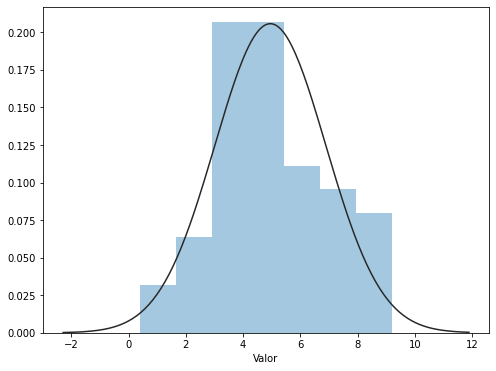

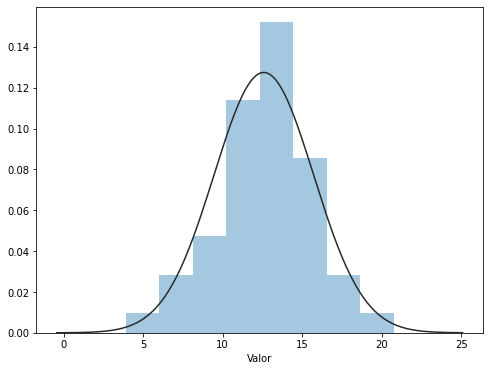

In [166]:
plt.figure(figsize=(8,6))
sns.distplot(a_df['Valor'], fit=norm ,kde=False)

plt.figure(figsize=(8,6))
sns.distplot(b_df['Valor'], fit=norm ,kde=False)

plt.show()

## 2.2. Gráfica de ambos datasets juntos

In [167]:
a_b_df = pd.DataFrame(np.concatenate([a_df['Valor'],b_df['Valor']]), columns=['Valor'])
a_b_df['Etiqueta'] = np.concatenate([a_df['Etiqueta'],b_df['Etiqueta']])
a_b_df = a_b_df.sort_values(by='Valor') #Ordenamos el dataset de menor a mayor
a_b_df = a_b_df.reset_index().drop('index', axis=1) #Reseteamos los indices del dataset ordenado y eliminamos la columna index que posee los indices anteriores al ordenamiento

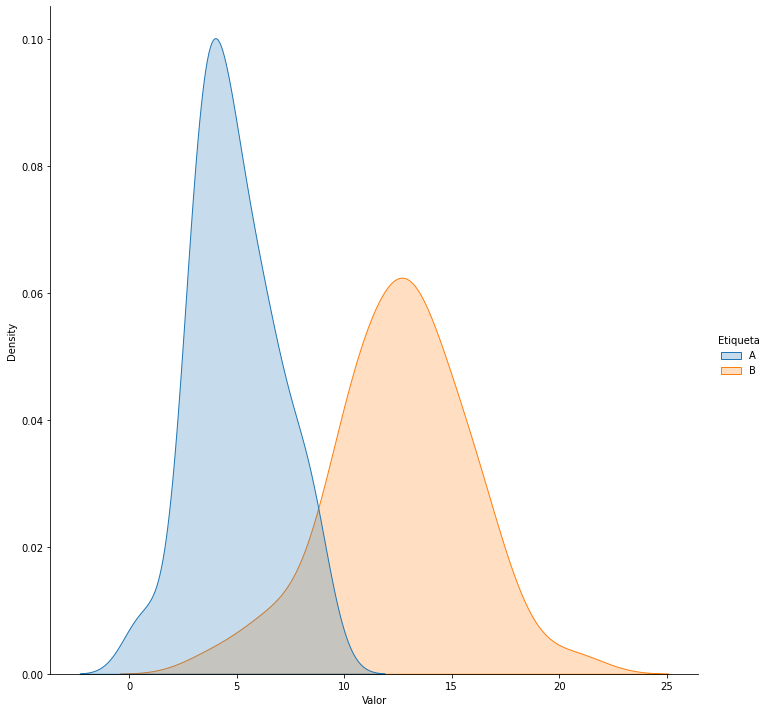

In [168]:
sns.displot(a_b_df, x='Valor', hue = 'Etiqueta', kind = 'kde', fill = True, legend=True, height=10)
plt.show()

# 3. Curva ROC y métricas de medición

## 3.1. Cálculo de métricas de medición

Para graficar la curva ROC vamos a suponer que los valores Verdaderos Positivos (True Positive, TP) son los valores del dataset A, mientras que los valores Falsos Positivos (False Positive) son los valores del dataset B.

In [169]:
ROC_df = a_b_df.copy()
TP = 0
FP = 0
TPR = []
FPR = []
TN = []
FN = []
accuracy = []
precision = []
f_measure = []
a_count = ROC_df.value_counts(subset=['Etiqueta'])[0] #cantidad de elementos con etiqueta A (TP)
b_count = ROC_df.value_counts(subset=['Etiqueta'])[1] #cantidad de elementos con etiqueta B (FP)

for i in range(len(ROC_df)):
  if ROC_df.iloc[i]['Etiqueta'] == 'A':
    TP += 1
  else:
    FP += 1

  TPR.append(TP/(a_count))
  FPR.append(FP/(b_count))
  TN.append(b_count - FP)
  FN.append(a_count - FP)
  
  accuracy.append((TP+TN[i])/(TP + TN[i] + FP + FN[i]))
  precision.append(TP/(TP+FP))
  f_measure.append((2*precision[i]*TPR[i]/(precision[i] + TPR[i]))) #2*precision*recall/(precision+recall)

TPR = np.asarray(TPR)
FPR = np.asarray(FPR)
TN = np.asarray(TN)
FN = np.asarray(FN)
accuracy = np.asarray(accuracy)
precision = np.asarray(precision)
f_measure = np.asarray(f_measure)

## 3.2. Gráfica de la curva ROC

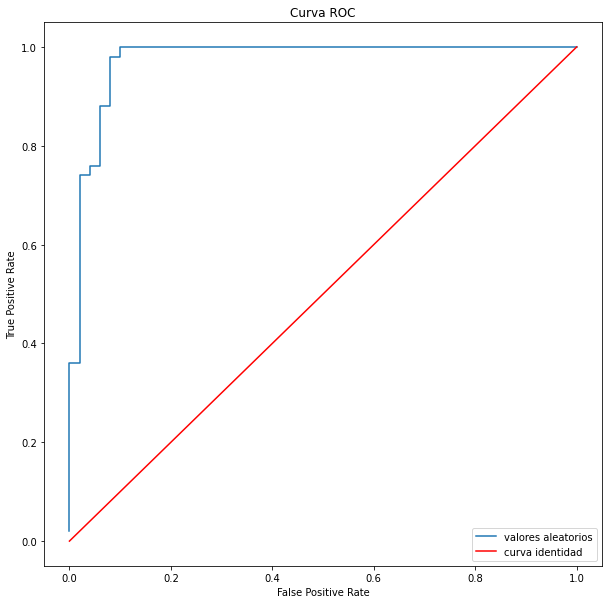

In [170]:
plt.figure(figsize=(10.0,10.0))
plt.plot(FPR,TPR, label='valores aleatorios')
x = np.arange(0,1.1,0.1)
plt.plot(x,x,color='red', label='curva identidad')
plt.title("Curva ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

## 3.3. Umbral de mínimo error

Para encontrar el punto mas alejado a la curva identidad (x - y = 0), reemplazamos en la siguiente ecuación los valores de cada punto (x1,y1) de la curva ROC obtenida. Considerando que A = 1, B = -1 y C = 0 de acuerdo a la ecuación de nuestra curva identidad. Luego el punto mas alejado será el mayor valor calculado.

![picture](https://i1.wp.com/lasmatematicas.eu/wp-content/uploads/2017/08/distancia-punto-recta.png?fit=720%2C197&ssl=1)

In [171]:
distance = abs((FPR[:] - TPR[:]) / np.sqrt(2))
max_distance = np.argwhere(distance == np.amax(distance))
max_distance = np.squeeze(max_distance)
print(max_distance)

[52 54]


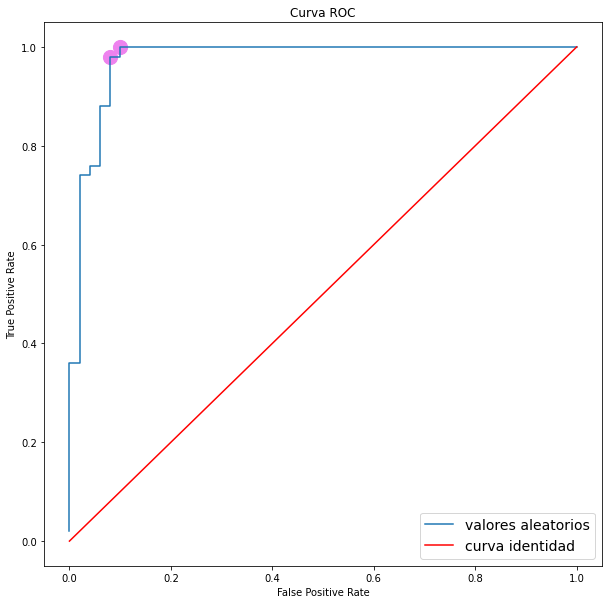


Umbral para tener el mínimo error = 52    8.489624
54    9.200510
Name: Valor, dtype: float64


In [172]:
plt.figure(figsize=(10.0,10.0))
plt.plot(FPR,TPR, label='valores aleatorios')
x = np.arange(0,1.1,0.1)
plt.plot(x,x,color='red', label='curva identidad')
plt.scatter(FPR[max_distance], TPR[max_distance], color='violet', s=200)
plt.title("Curva ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(fontsize=14)
plt.show()

print(f"\nUmbral para tener el mínimo error = {a_b_df['Valor'][max_distance]}")

# 4. Exactitud, precisión y f-measure

A continuación se grafican los valores de exactitud, precisión y f-measure, detallando el valor alcanzado utilizando el umbral calculado anteriormente

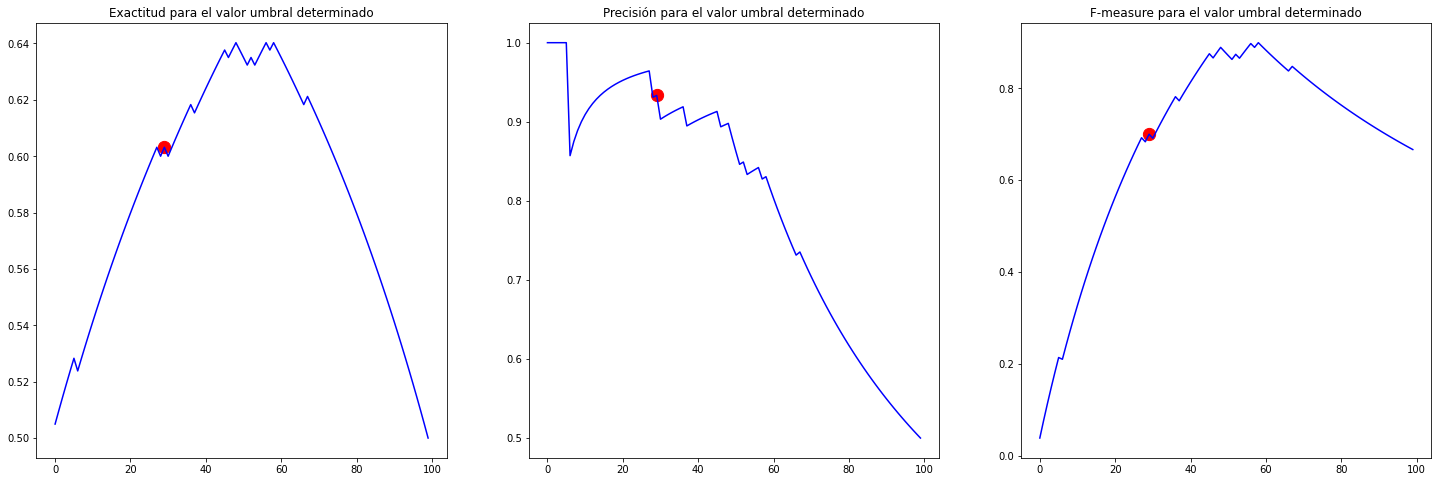

In [149]:
df1 = ROC_df.copy()

fig, axs = plt.subplots(1,3,figsize=(25,8))

plt.subplot(1,3,1)
plt.plot(accuracy, color='blue')
plt.scatter(max_distance, accuracy[max_distance], color='red', s=150)
plt.title("Exactitud para el valor umbral determinado")

plt.subplot(1,3,2)
plt.plot(precision, color='blue')
plt.scatter(max_distance, precision[max_distance], color='red', s=150)
plt.title("Precisión para el valor umbral determinado")

plt.subplot(1,3,3)
plt.plot(f_measure, color='blue')
plt.scatter(max_distance, f_measure[max_distance], color='red', s=150)
plt.title("F-measure para el valor umbral determinado")

plt.show()